In [4]:
import os
import pandas as pd
import numpy as np
from scipy.stats import iqr
from collections import defaultdict

# Pair 빈도 저장 경로
labeled_data_path = "C:/Users/d/OneDrive - 충북대학교/바탕 화면/캡스톤디자인/user_labeled"

# 중복 연속 Label 제거 함수
def CollapseRecurringLabels(original_list):
    result_list = [original_list[0]]  
    for i in range(1, len(original_list)):
        if original_list[i] != original_list[i - 1]:
            result_list.append(original_list[i])
    return result_list

# Threshold 계산 함수
def compute_threshold(frequencies):
    median_value = np.median(frequencies)
    iqr_value = iqr(frequencies)
    k = 2
    threshold = median_value + k * iqr_value
    return threshold

# 1. Pair Frequency 계산
pair_frequency = defaultdict(int)

for file_name in os.listdir(labeled_data_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(labeled_data_path, file_name)
        df = pd.read_csv(file_path)

        labels = df['grid_label'].tolist()
        unique_labels = CollapseRecurringLabels(labels)

        previous_label = None
        for label in unique_labels:
            if previous_label is not None:
                pair = (previous_label, label)
                pair_frequency[pair] += 1
            previous_label = label

# 2. 결과 저장
frequency_df = pd.DataFrame(list(pair_frequency.items()), columns=['Label', 'Frequency'])
# frequency_df.to_csv('pair_frequencies.csv', index=False)

# 3. Threshold 계산 및 출력
frequencies = frequency_df['Frequency'].tolist()
threshold = compute_threshold(frequencies)

print(f"Pair Frequency Threshold: {threshold}")

Pair Frequency Threshold: 4.0


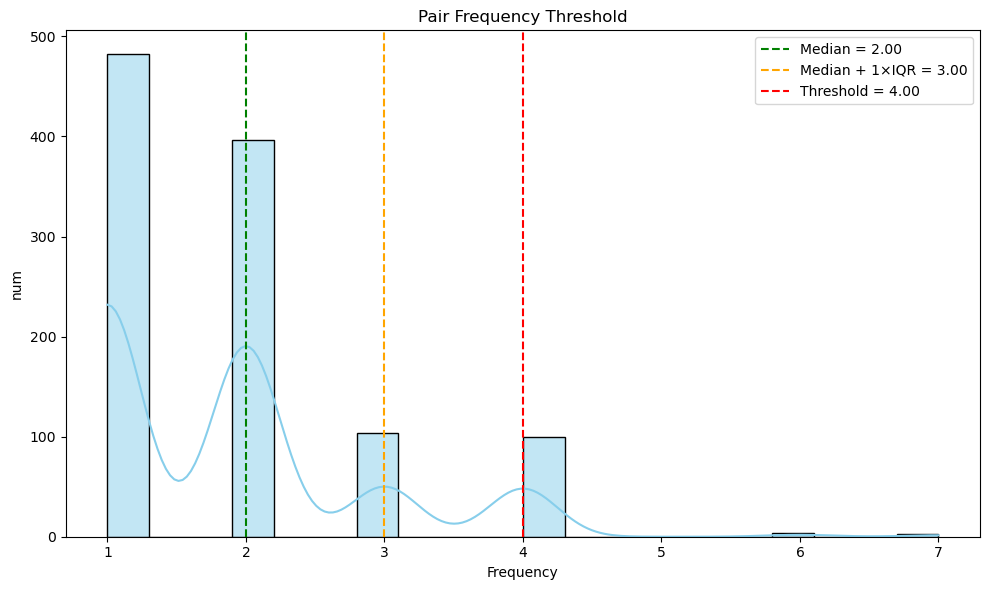

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기존 코드에서 frequencies는 이미 리스트 형태로 추출됨
frequencies = frequency_df['Frequency'].tolist()

# IQR 기반 threshold 계산
median_value = np.median(frequencies)
iqr_value = iqr(frequencies)
k = 2
threshold = median_value + k * iqr_value

# 시각화
plt.figure(figsize=(10, 6))
sns.histplot(frequencies, bins=20, kde=True, color='skyblue')

# 기준선 그리기
plt.axvline(median_value, color='green', linestyle='--', label=f"Median = {median_value:.2f}")
plt.axvline(median_value + iqr_value, color='orange', linestyle='--', label=f"Median + 1×IQR = {median_value + iqr_value:.2f}")
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold:.2f}")

# 출력용 텍스트
plt.title("Pair Frequency Threshold")
plt.xlabel("Frequency")
plt.ylabel("num")
plt.legend()
plt.tight_layout()
plt.show()

Pair Frequency Threshold: 4
Q1: 1
Q3: 2
IQR: 1


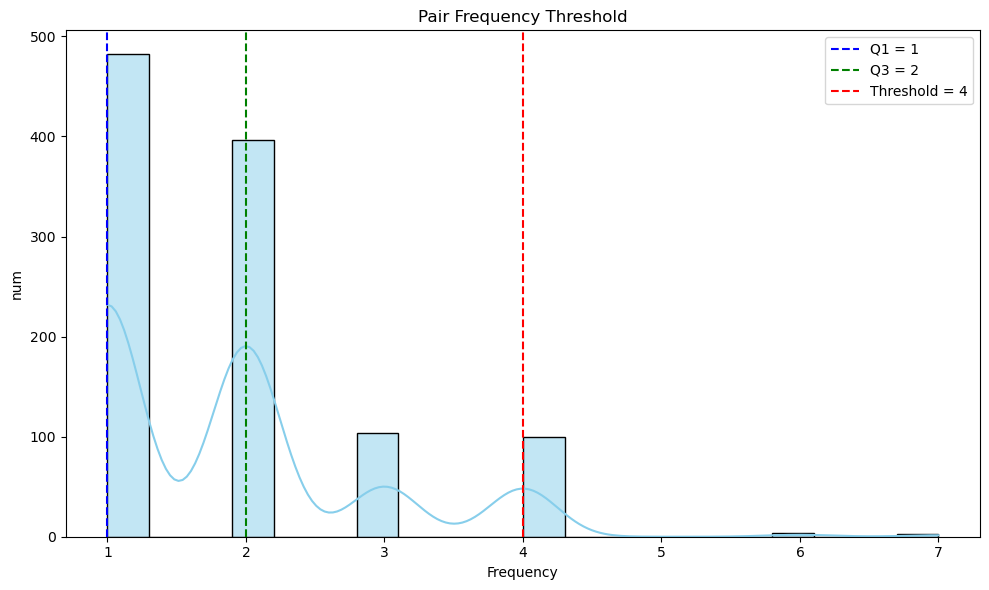

In [11]:
import os
import pandas as pd
import numpy as np
from scipy.stats import iqr
from collections import defaultdict

# Pair 빈도 저장 경로
labeled_data_path = "C:/Users/d/OneDrive - 충북대학교/바탕 화면/캡스톤디자인/user_labeled"

# 중복 연속 Label 제거 함수
def CollapseRecurringLabels(original_list):
    result_list = [original_list[0]]  
    for i in range(1, len(original_list)):
        if original_list[i] != original_list[i - 1]:
            result_list.append(original_list[i])
    return result_list

# Threshold 계산 함수
def compute_threshold(frequencies):
    q1 = np.quantile(frequencies, 0.25)
    q3 = np.quantile(frequencies, 0.75)
    iqr_value = q3 - q1
    threshold = q3 + 1.5 * iqr_value  # 이상치의 기준
    return threshold, q1, q3, iqr_value  # threshold와 Q1, Q3, IQR을 반환

# 1. Pair Frequency 계산
pair_frequency = defaultdict(int)

for file_name in os.listdir(labeled_data_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(labeled_data_path, file_name)
        df = pd.read_csv(file_path)

        labels = df['grid_label'].tolist()
        unique_labels = CollapseRecurringLabels(labels)

        previous_label = None
        for label in unique_labels:
            if previous_label is not None:
                pair = (previous_label, label)
                pair_frequency[pair] += 1
            previous_label = label

# 2. 결과 저장
frequency_df = pd.DataFrame(list(pair_frequency.items()), columns=['Label', 'Frequency'])

# 3. Threshold 계산 및 출력
frequencies = frequency_df['Frequency'].tolist()

# Compute threshold 및 Q1, Q3, IQR 값
threshold, q1, q3, iqr_value = compute_threshold(frequencies)

# 반올림 적용 (소수점 없이 정수로 출력)
threshold = round(threshold)
q1 = round(q1)
q3 = round(q3)
iqr_value = round(iqr_value)

print(f"Pair Frequency Threshold: {threshold}")
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr_value}")

# 시각화
plt.figure(figsize=(10, 6))
sns.histplot(frequencies, bins=20, kde=True, color='skyblue')

# 기준선 그리기
plt.axvline(q1, color='blue', linestyle='--', label=f"Q1 = {q1}")
plt.axvline(q3, color='green', linestyle='--', label=f"Q3 = {q3}")
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")

# 출력용 텍스트
plt.title("Pair Frequency Threshold")
plt.xlabel("Frequency")
plt.ylabel("num")
plt.legend()
plt.tight_layout()
plt.show()